In [1]:
import pandas as pd
import librosa
import torchaudio
import torch


from tqdm import tqdm
tqdm.pandas()

In [42]:
DATA_PATH = "../data"
CFG_PATH = "../src/config"

In [43]:
df = pd.read_csv(DATA_PATH + "/cv_split.csv")

In [44]:
df.head()

primary_label              filename  fold
0       1139490  1139490/CSA36385.ogg     1
1       1139490  1139490/CSA36389.ogg     0
2       1192948  1192948/CSA36358.ogg     2
3       1192948  1192948/CSA36366.ogg     3
4       1192948  1192948/CSA36373.ogg     0

In [45]:
from omegaconf import OmegaConf
from hydra import initialize, compose

with initialize(config_path=CFG_PATH): 
    cfg = compose(config_name="config")

/var/folders/my/3f51xtyn3cn03pv1sqpjrh740000gn/T/ipykernel_9513/686048581.py:4: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path=CFG_PATH):


In [50]:
cfg['data']['paths']['audio_dir'] = DATA_PATH + "/birdclef2025/train_audio"

In [51]:
from src.augmentations.audio_augmentations import KEY2AUDIO_AUGMENTATION

audio_transforms = []
if hasattr(cfg.augmentation.audio, "audio_transforms") and cfg.augmentation.audio.audio_transforms:
    audio_transforms = [
        KEY2AUDIO_AUGMENTATION[t.name](**t.params)
        for t in cfg.augmentation.audio.audio_transforms
    ]

In [52]:
from audiomentations import Compose
from src.utils.data import create_datasets, create_dataloaders

train_dataset, val_dataset, class_weights = create_datasets(
    df=df,
    audio_dir=cfg.data.paths.audio_dir,
    **cfg.data.dataset_args,
    audio_transforms=Compose(audio_transforms),
)

/Users/nuinashco/Projects/BirdCLEF2025/src/utils/data.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filepath'] = df[filenpath_col].apply(lambda path: os.path.join(audio_dir, path))
/Users/nuinashco/Projects/BirdCLEF2025/src/utils/data.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filepath'] = df[filenpath_col].apply(lambda path: os.path.join(audio_dir, path))


In [53]:
def get_label(target):
    return train_dataset.target_encoder.inverse_transform(target.reshape(1, -1))[0][0]

In [54]:
train_dataset.target_encoder.categories_[0].shape[0]

206

In [55]:
sample = train_dataset[1]

sample

(tensor([-0.0471, -0.0593, -0.0627,  ..., -0.0055, -0.0049, -0.0032]),
 tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0

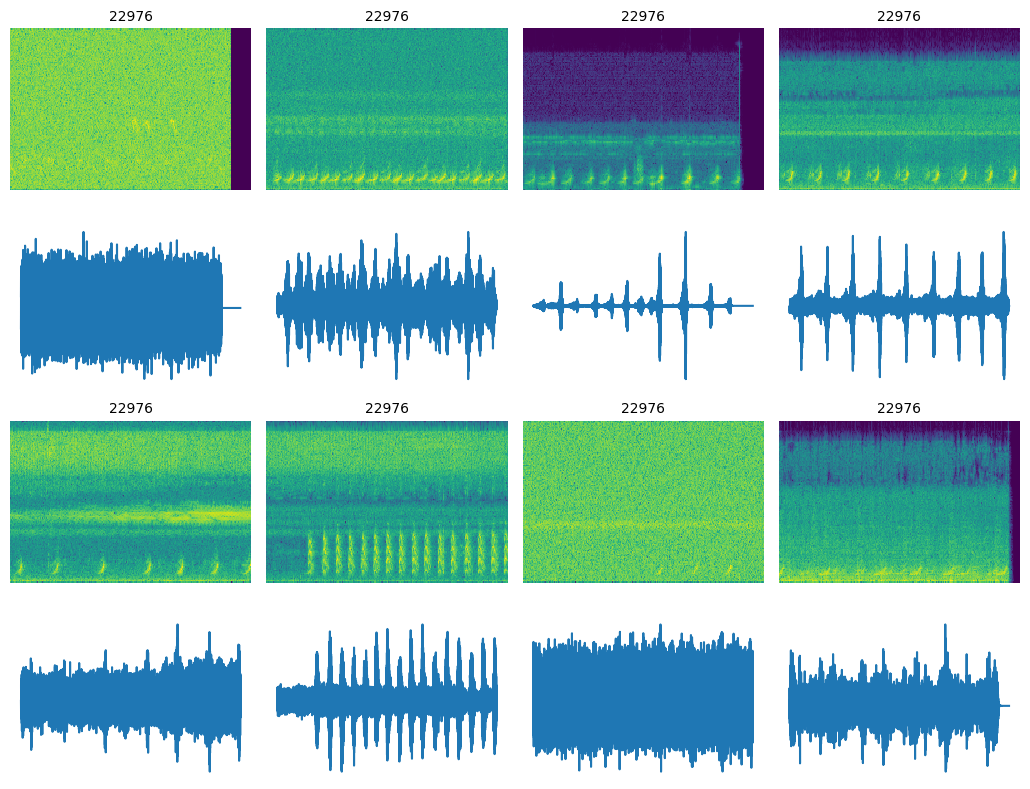

Playing: 22976


Playing: 22976


Playing: 22976


Playing: 22976


Playing: 22976


Playing: 22976


Playing: 22976


Playing: 22976


In [56]:
from src.utils.plots import plot_wave_spectrograms


samples = [train_dataset[ii] for ii in range(200, 208)]
waveforms = [sample[0] for sample in samples]
targets = [get_label(sample[1]) for sample in samples]

plot_wave_spectrograms(
    waveforms=waveforms,
    sample_rate=train_dataset.sample_rate,
    class_names=targets,
    num_cols=4
)